In [3]:
#Import Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#Filter for Data Analyst UK jobs
job_title1 = 'Data Analyst'
job_country = 'United States'
df_da_us = df[(df['job_title_short'] == job_title1) & (df['job_country'] == job_country)].copy()

In [4]:
df_da_us = df_da_us.dropna(subset=['salary_year_avg'])

In [5]:
df_da_us['salary_year_avg'].sample(10)

221716     80000.0
553139     42500.0
454262     80000.0
573768     55273.0
459889     83500.0
744297     81682.0
13391     157500.0
80420      71500.0
545759     62500.0
271315    115000.0
Name: salary_year_avg, dtype: float64

<Axes: >

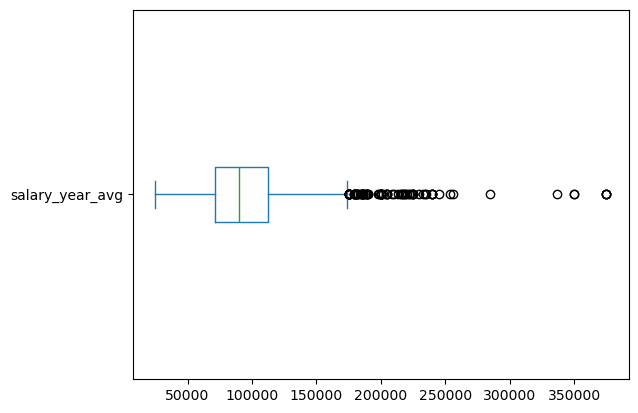

In [6]:
df_da_us['salary_year_avg'].plot(kind='box', vert=False)

C:\Users\ITZJA\AppData\Local\Temp\ipykernel_5136\3268853506.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


<function matplotlib.pyplot.show(close=None, block=None)>

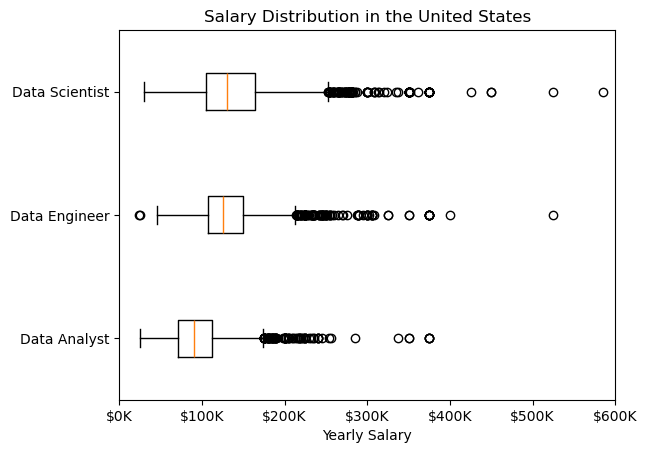

In [7]:
job_titles =  ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_us = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == job_country)].copy()
df_us = df_us.dropna(subset=['salary_year_avg'])

job_list = [df_us[df_us['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title(f'Salary Distribution in the {job_country}')
plt.xlabel('Yearly Salary')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600_000)
plt.show